# E-Commerce - Linear Regression Assignment 

In [ ]:
__author__ = "Renan Luiz Andrade Vital"
__email__ = "vitalrenan@icloud.com"


"""
    This is a data analysis and prediction with linear regression from E-commerce data. 
    
    The Ecommerce Customers csv file has fake Customer info, such as:
        - Email;
        - Address;
        - Color Avatar;
        - Avg. Session Length;
        - Average session of in-store style advice sessions;
        - Time on App: Average time spent on App in minutes;
        - Time on Website: Average time spent on Website in minutes;
        - Length of Membership: How many years the customer has been a member;
        
    The prediction model applied is 
"""

In [1]:
#Imports from Pandas, Numpy, MatPlotLib, SeaBorn libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import of the CSV file as pandas dataframe
#Analysing the imported data
df = pd.read_csv("Ecommerce Customers")
df.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [3]:
#Analysing statistically the imported data
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
#Analysing data info of the imported data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


**Checking corretation between time spent on website X amount spent and time spent on app X amount spent**

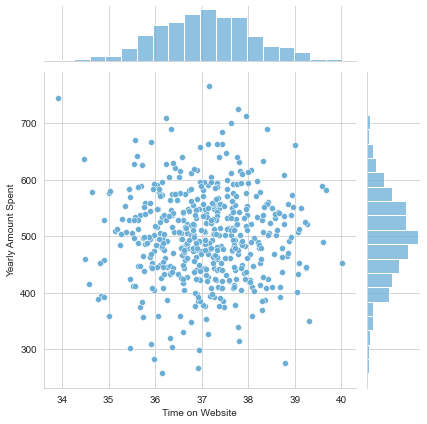

In [5]:
# Correlation between time spent on website and value amount spent
sns.set_style('whitegrid')
sns.set_palette("Blues",1)
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df)

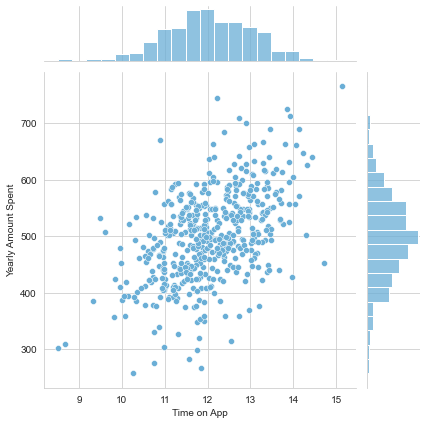

In [6]:
# Correlation between time spent on app and value amount spent
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df)

<i> Conclusion: As we can see there is a higher correlation between time spent on app and purchases</i>

**Checking other correlations**

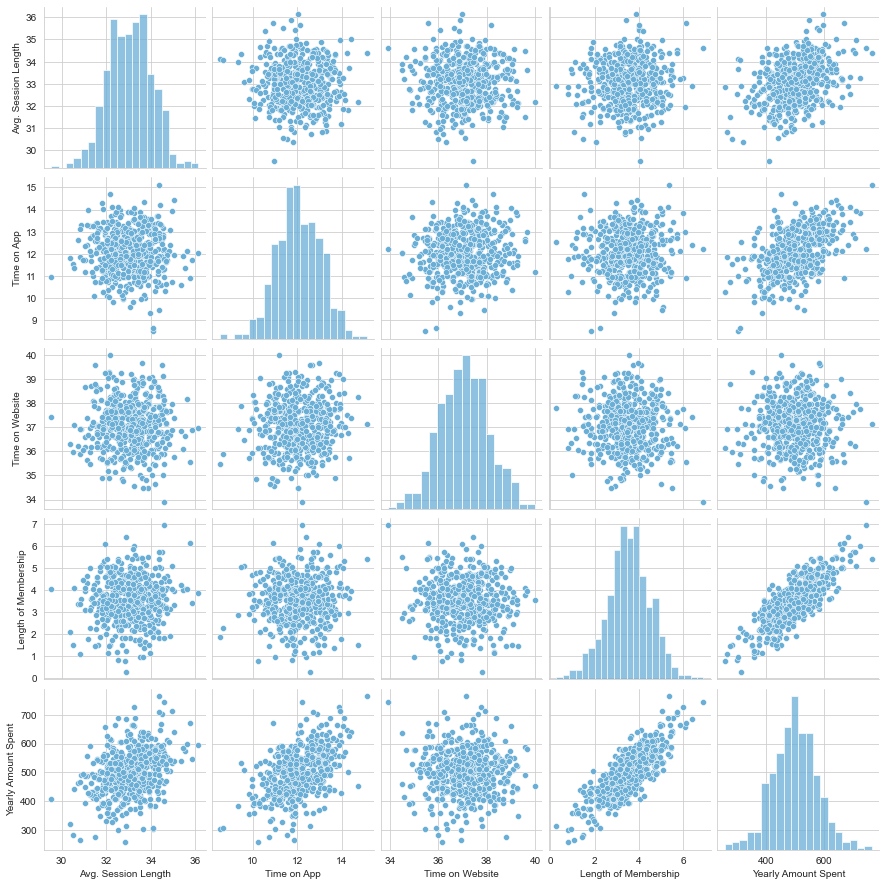

In [7]:
sns.pairplot(df)

<i>Conclusion: There is an even higher correlation between "length of membership" and "yearly amount Spent"</i>

**Checking the linear regression model of "length of membership" and "yearly amount Spent"**

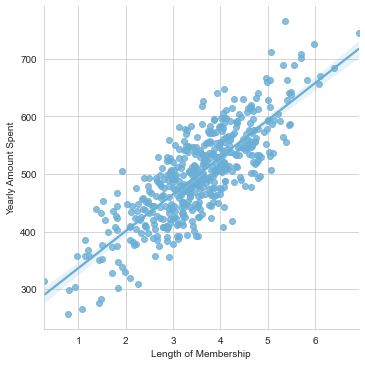

In [8]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

<i>Conslusion: There a reasonable linear fit, because of the low level of error between dispersion and the linear mean</i>

# Linear Regression

In [9]:
#setting parameters for the linear regression

X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

#Splitting the data into training and  testing sets with train_test_split from sklearn lib
from sklearn.model_selection import train_test_split

#LinearRegression.fit(X_train,y_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Traning model**

In [10]:
#importing linear regression from SK Learn
from sklearn.linear_model import LinearRegression

#Instanciating Linear Regression
lm = LinearRegression()

#Traning
lm.fit(X_train,y_train)

LinearRegression()

In [11]:
# Model coeficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


**Prediction**

Text(0, 0.5, 'Predicted Y')

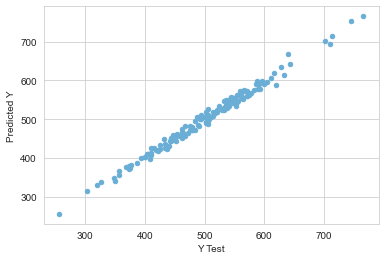

In [12]:
#Assigning the prediction results
pred = lm.predict(X_test)

plt.scatter(y_test,pred,s=20)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

<i>The figure shows that the prediction generated has a fair accuracy </i>

**Model Evaluation**

In [13]:
# calculating the Root Mean Square Error (RMSE) in order to check the predictions efficiency

#Importing metrics from SK learn lib
from sklearn import metrics

#Assigning the result of RMSE
rmse = float(np.sqrt(metrics.mean_squared_error(y_test, pred)))

print('RMSE:', "{:.4f}".format(rmse))

RMSE: 8.9338


C:\Users\Renan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


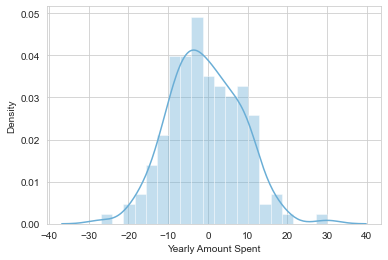

In [14]:
#Analysing the residuals distribution TEST - PREDICTION 
sns.distplot((y_test-pred),bins=20);

<i>The residual error value has a normal distribuition and it means that the prediction is performing well</i>

# Conclusion

<i>The best correlation between user data and purhases is the "Length of Membership". Therefore, instead of investing on website or app upgrades, resources could have more beneficial effect in users Yearly Amount Spent if the lenght of membership of other users were improved. 

The dataframe below shows the correlations these parameters:'Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership'</i>

In [15]:
#Dataframe of the revenue increament by each feature considerated separately

coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


<i>Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.
Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.
Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.
Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.</i>